In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.drop(['Unnamed: 32', 'id'] ,axis = 1, inplace = True)

In [5]:
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.preprocessing import StandardScaler as SS
from sklearn.model_selection import train_test_split as tts

from sklearn.linear_model import LogisticRegression as LOR
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import ExtraTreesClassifier as ETC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNC

from sklearn.metrics import roc_auc_score as ras, roc_curve as rc

In [6]:
x = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']

In [8]:
x = SS().fit_transform(x)

In [10]:
y = LE().fit_transform(y)

In [11]:
xtrain, xtest, ytrain, ytest = tts(x, y, test_size = 0.4, stratify = y, random_state = 87)

# Logistic Regression

In [12]:
lor = LOR()
lor.fit(xtrain, ytrain)
trainProb = lor.predict_proba(xtrain)[:,1]
testProb = lor.predict_proba(xtest)[:,1]
ras(ytrain, trainProb), ras(ytest, testProb)

(0.9953638972698506, 0.9998354586589882)

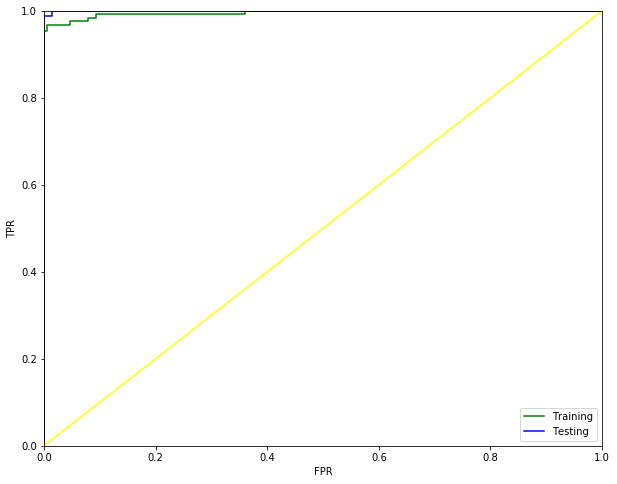

In [14]:
plt.figure(figsize = (10,8))
fpr, tpr, _ = rc(ytrain, trainProb)
plt.plot(fpr, tpr, c = 'green', label = 'Training')
fpr, tpr, _ = rc(ytest, testProb)
plt.plot(fpr, tpr, c = 'blue', label = 'Testing')
temp = np.linspace(0,1,1000)
plt.plot(temp, temp, c = 'yellow')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim((0,1))
plt.ylim((0,1))
plt.legend()
plt.show()

# Decision Tree

In [15]:
train_scr = []
test_scr = []

for i in range(1,51):
    dtc = DTC(max_depth = i)
    dtc.fit(xtrain, ytrain)
    
    train_scr.append(ras(ytrain, dtc.predict_proba(xtrain)[:,1]))
    test_scr.append(ras(ytest, dtc.predict_proba(xtest)[:,1]))

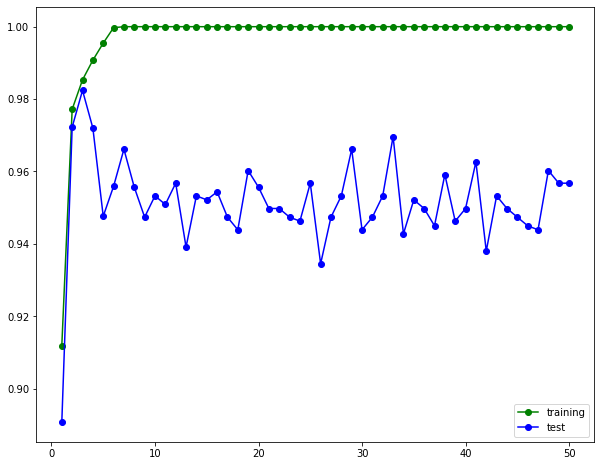

In [18]:
plt.figure(figsize = (10,8))
plt.plot(range(1,51), train_scr, c = 'green', marker = 'o', label = 'training')
plt.plot(range(1,51), test_scr, c = 'blue', label = 'test', marker = 'o')
plt.legend()
plt.show()

In [19]:
dtc = DTC(max_depth = 4)
dtc.fit(xtrain, ytrain)
ras(ytrain, dtc.predict_proba(xtrain)[:,1]), ras(ytest, dtc.predict_proba(xtest)[:,1])

(0.9905990139083082, 0.9680378445084328)

# Random Forest

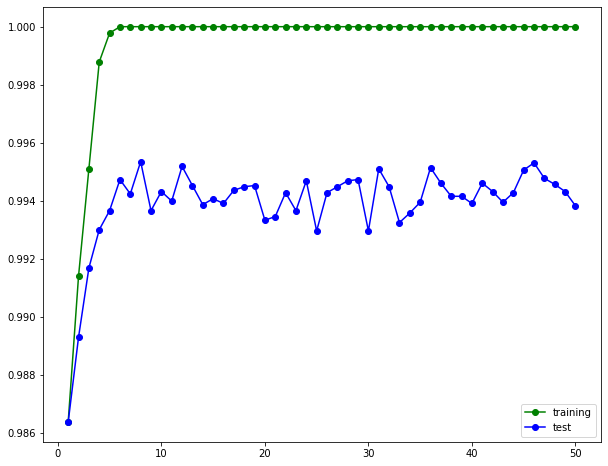

In [20]:
train_scr = []
test_scr = []

for i in range(1,51):
    rfc = RFC(max_depth = i)
    rfc.fit(xtrain, ytrain)
    
    train_scr.append(ras(ytrain, rfc.predict_proba(xtrain)[:,1]))
    test_scr.append(ras(ytest, rfc.predict_proba(xtest)[:,1]))
    
plt.figure(figsize = (10,8))
plt.plot(range(1,51), train_scr, c = 'green', marker = 'o', label = 'training')
plt.plot(range(1,51), test_scr, c = 'blue', label = 'test', marker = 'o')
plt.legend()
plt.show()

In [21]:
rfc = RFC(max_depth = 3)
rfc.fit(xtrain, ytrain)
ras(ytrain, rfc.predict_proba(xtrain)[:,1]), ras(ytest, rfc.predict_proba(xtest)[:,1])

(0.9952535138715137, 0.9912793089263677)

# AdaBoost, GradientBoosting, ExtraTrees

In [27]:
abc = ABC()
gbc = GBC()
etc = ETC()

abc.fit(xtrain, ytrain)
gbc.fit(xtrain, ytrain)
etc.fit(xtrain, ytrain)

print([ras(ytrain, abc.predict_proba(xtrain)[:,1]), ras(ytest, abc.predict_proba(xtest)[:,1])])
print([ras(ytrain, gbc.predict_proba(xtrain)[:,1]), ras(ytest, gbc.predict_proba(xtest)[:,1])])
print([ras(ytrain, etc.predict_proba(xtrain)[:,1]), ras(ytest, etc.predict_proba(xtest)[:,1])])

[1.0, 0.9856849033319621]
[1.0, 0.9976964212258329]
[1.0, 0.9964623611682435]


#  K-NN

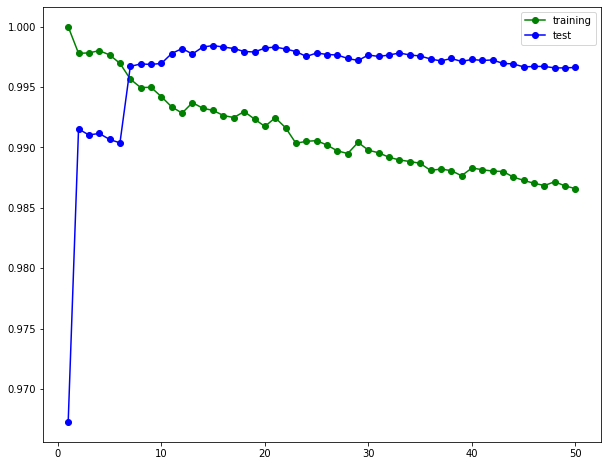

In [28]:
train_scr = []
test_scr = []

for i in range(1,51):
    knc = KNC(n_neighbors = i)
    knc.fit(xtrain, ytrain)
    
    train_scr.append(ras(ytrain, knc.predict_proba(xtrain)[:,1]))
    test_scr.append(ras(ytest, knc.predict_proba(xtest)[:,1]))
    
plt.figure(figsize = (10,8))
plt.plot(range(1,51), train_scr, c = 'green', marker = 'o', label = 'training')
plt.plot(range(1,51), test_scr, c = 'blue', label = 'test', marker = 'o')
plt.legend()
plt.show()

In [30]:
knc = KNC(n_neighbors = 10)
knc.fit(xtrain, ytrain)
ras(ytrain, knc.predict_proba(xtrain)[:,1]), ras(ytest, knc.predict_proba(xtest)[:,1])

(0.9942048715873133, 0.9969559851912793)

# SVM

In [31]:
svc = SVC(probability = True)
svc.fit(xtrain, ytrain)
ras(ytrain, svc.predict_proba(xtrain)[:,1]), ras(ytest, svc.predict_proba(xtest)[:,1])

(0.9958422253293104, 0.9990127519539284)

# Gaussian NB

In [32]:
gnb = GNB()
gnb.fit(xtrain, ytrain)
ras(ytrain, gnb.predict_proba(xtrain)[:,1]), ras(ytest, gnb.predict_proba(xtest)[:,1])

(0.9857605416145412, 0.9940765117235705)